<a href="https://colab.research.google.com/github/LaiTienQuang/kiemtracuoiky/blob/main/emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, load_model
from keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD

In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [43]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/projectAI/emotions/train',
                                          target_size=(150,150),
                                          batch_size=3,
                                          class_mode='categorical')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/projectAI/emotions/validation',
                                                    target_size=(150,150),
                                                    batch_size=3,
                                                    class_mode='categorical')

Found 62 images belonging to 4 classes.
Found 62 images belonging to 4 classes.


In [44]:
validation_dataset.class_indices

{'angry': 0, 'fear': 1, 'happy': 2, 'suprise': 3}

In [45]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu',
                 kernel_initializer = 'he_uniform',
                 padding = 'same',
                 input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation='relu',
                 kernel_initializer = 'he_uniform',
                 padding = 'same',
                 ))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu',
                 kernel_initializer = 'he_uniform',
                 padding = 'same',
                 ))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',
                kernel_initializer = 'he_uniform'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_25 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 conv2d_27 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

In [46]:
model.compile(optimizer=RMSprop(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_dataset,
                  steps_per_epoch= 3,
                  epochs=50,
                  #batch_size=64,
                  validation_data= validation_dataset)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/50
3/3 [==============================] - 17s 8s/step - loss: 1775.2057 - accuracy: 0.3333 - val_loss: 1.7258 - val_accuracy: 0.2581
Epoch 2/50
3/3 [==============================] - 2s 777ms/step - loss: 24.9756 - accuracy: 0.0000e+00 - val_loss: 33.9706 - val_accuracy: 0.1774
Epoch 3/50
3/3 [==============================] - 2s 675ms/step - loss: 92.0048 - accuracy: 0.1250 - val_loss: 3.8883 - val_accuracy: 0.1774
Epoch 4/50
3/3 [==============================] - 2s 601ms/step - loss: 21.1101 - accuracy: 0.4444 - val_loss: 1.6800 - val_accuracy: 0.2258
Epoch 5/50
3/3 [==============================] - 1s 254ms/step - loss: 1.5185 - accuracy: 0.3333 - val_loss: 8.0277 - val_accuracy: 0.3226
Epoch 6/50
3/3 [==============================] - 1s 598ms/step - loss: 2.0420 - accuracy: 0.5556 - val_loss: 1.3980 - val_accuracy: 0.2742
Epoch 7/50
3/3 [==============================] - 1s 356ms/step - loss: 1.4425 - accuracy: 0.2222 - val_loss: 1.3493 - val_accuracy: 0.3065
Epoch 8/50


happy


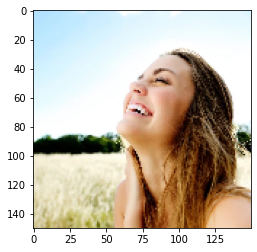

In [58]:
img=image.load_img('/content/drive/MyDrive/projectAI/emotions/test/happy/11.jpg',target_size=(150,150))
plt.imshow(img)
plt.show
  
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])

val=np.argmax(model.predict(images))
if val==0:
  print('angry')
elif val==1:
  print('fear')
elif val==2:
  print('happy')
elif val==3:
  print('suprise')